# COGS 108 - EDA Checkpoint

# Names

- Nicholas Fisher
- Kelly Luu
- Isiah Nicasio
- Destynee Tau

# Research Question

How does housing median income affect the concentration of fast food restaurants within California? 

# Dataset(s)

**Dataset Name:** Fast food restaurants across US

**Link:** [Fast Food Dataset](https://www.kaggle.com/khushishahh/fast-food-restaurants-across-us)

**Number of Observations:** `10000` observations and `11` attributes
<p>&nbsp;</p>

**Dataset Name:** California Housing Prices Data (5 new features!)

**Link:** [Housing Dataset](https://www.kaggle.com/fedesoriano/california-housing-prices-data-extra-features)

**Number of Observations:** `20640` observations and `14` attributes
<p>&nbsp;</p>

----
#### 1-2 sentences describing each dataset:
 #### Fast Food Restaurants Across US:
 > A list of fast-food restaurants that includes their information about location, more specifically their address, city, country,  latitude, longitude and province.

 #### California Housing Prices Data:
 > Our other dataset is the price for housing in California which gives the price, location, the number of rooms in the house.


 #### If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets:
 > With both of these CSV files we will compare and contrast the concentration of fast food places within higher and lower economic places. We will combine these two datasets through latitude and longitude.

# Setup

In [1]:
# Importing packages that will be implemented in the notebook
import patsy
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data Cleaning

<!-- Describe your data cleaning steps here. -->

**Food Data Set:**
- Imported the data files and read them in using `Pandas`.
- Examined the shape of the dataset.
- Checked to see if the dataset contained `NAN` values.
- Dropped the `categories`, `country`, and `unamed: 0` columns since the data in
these columns isn't relevant to what we are analyzing.
- Filtered the dataset by `province` to show what is relevant for `CA`.
- Lowercase all the strings in each columns to make it easier to code. For example:
(city, address, name, province, website, and the names of the columns)
- Reset the index.
- Stripped each column to remove any white spaces.
- Changed `postal code` into all integer variables.
- Lastly, we viewed our dataset to make sure it is cleaned how we expect.

**Housing Data Set:**
- Imported the data files and read them in using `Pandas`.
- Examined the shape of the dataset.
- Checked to see if the dataset contained `NAN` values.
- Lowercase all the strings in each columns to make it easier to code.


## Food Dataset

In [2]:
# Reading in the CSV and storing as a DataFrame
foodData = pd.read_csv('https://raw.githubusercontent.com/kellyyluu/COGS108_Repo/main/Fast_Food_Restaurants_US%202.csv')
foodData

,Unnamed: 0,address,categories,city,country,latitude,longitude,name,postalCode,province,websites
0,0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,https://locations.sonicdrivein.com/la/thibodau...
1,1,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,https://locations.sonicdrivein.com/la/thibodau...
2,2,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN,"http://www.tacobell.com,https://locations.taco..."
3,3,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,TN,"http://www.arbys.com,https://locations.arbys.c..."
4,4,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,GA,http://www.steaknshake.com/locations/23851-ste...
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,3460 Robinhood Rd,Fast Food Restaurants,Winston-Salem,US,36.117563,-80.316553,Pizza Hut,27106,NC,http://www.pizzahut.com
9996,9996,3069 Kernersville Rd,Fast Food Restaurants,Winston-Salem,US,36.077718,-80.176748,Pizza Hut,27107,NC,http://www.pizzahut.com
9997,9997,838 S Main St,Fast Food Restaurants,Kernersville,US,36.111015,-80.089165,Pizza Hut,27284,NC,http://www.pizzahut.com
9998,9998,1702 Glendale Dr SW,Fast Food Restaurants,Wilson,US,35.719981,-77.945795,Pizza Hut,27893,NC,http://www.pizzahut.com


In [3]:
# Checking how many rows and columns our dataset has
foodData.shape

(10000, 11)

In [4]:
# Determining if there are any `null` values
foodData.isnull().values.any()

False

In [5]:
# Seeing what data types are in our dataset
foodData.dtypes

Unnamed: 0      int64
address        object
categories     object
city           object
country        object
latitude      float64
longitude     float64
name           object
postalCode     object
province       object
websites       object
dtype: object

### The following three cells will find the unique values within the dataset

In [6]:
foodData['categories'].unique()

array(['American Restaurant and Fast Food Restaurant',
       'Fast Food Restaurants', 'Fast Food Restaurant', 'Fast Food',
       'Fast Food Restaurant and Ice Cream Shop',
       'Ice Cream Shop and Fast Food Restaurant',
       'Fast Food Restaurant and Mexican Restaurant',
       'Fast Food Restaurant and Burger Joint', 'Fast food restaurants',
       'Fast Food Restaurant, Mexican Restaurant, and Taco Place',
       'American Restaurant, Sandwich Place, and Fast Food Restaurant',
       'Fast Food Restaurant, American Restaurant, and Sandwich Place',
       'Burger Joint and Fast Food Restaurant Gulf Breeze',
       'Fast Food Restaurant, Sandwich Place, and American Restaurant',
       'Restaurant, Fast Food Restaurant, and Sandwich Place',
       'Fast Food Restaurant and Playground',
       'Sandwich Place, Pizza Place, and Fast Food Restaurant',
       'American Restaurant, Fast Food Restaurant, and Sandwich Place',
       'Ice Cream Shop and Fast Food Restaurant Christian Par

In [7]:
foodData['country'].unique()

array(['US'], dtype=object)

In [8]:
foodData['province'].unique()

array(['LA', 'TN', 'GA', 'MI', 'CA', 'NY', 'TX', 'OH', 'SC', 'MS', 'IN',
       'MA', 'FL', 'MO', 'PA', 'IL', 'CT', 'KY', 'KS', 'IA', 'HI', 'ID',
       'NC', 'DE', 'AZ', 'WI', 'CO', 'AR', 'SD', 'WV', 'WY', 'VA', 'OR',
       'MD', 'WA', 'UT', 'NV', 'OK', 'ME', 'ND', 'NH', 'VT', 'NJ', 'NE',
       'MN', 'MT', 'AL', 'NM', 'AK', 'RI'], dtype=object)

In [9]:
# Making all the columns lowercase and removing white spaces
foodData.columns = foodData.columns.str.strip().str.lower()
# Filter dataset for `CA` only
foodData = foodData[foodData['province'] == 'CA']
# Dropping the `country` and `categories` column
foodData.drop(['unnamed: 0','country', 'categories'], inplace=True, axis=1, errors='ignore')

foodData

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,address,city,latitude,longitude,name,postalcode,province,websites
7,4111 Oceanside Blvd,Oceanside,33.205722,-117.288645,Chipotle Mexican Grill,92056,CA,"http://www.chipotle.com,http://www.lasalsa.com"
14,1190 W Foothill Blvd,Azusa,34.133291,-117.924566,Carl's Jr,91702,CA,"http://www.carlsjr.com,http://www.carlsjr.com/"
17,6316 W 89th St,Los Angeles,33.955923,-118.396443,Togo's,90045,CA,http://www.togosspeedlunch.com/
70,2992 Jamacha Rd,El Cajon,32.739923,-116.942156,Burger King,92019,CA,"http://www.burgerking.com/,http://www.bk.com"
71,706 Fletcher Pkwy,El Cajon,32.808270,-116.971370,Boston Market,92020,CA,"http://www.bostonmarket.com,https://bostonmark..."
...,...,...,...,...,...,...,...,...
9983,11916 Aviation Blvd,Inglewood,33.924828,-118.378075,SUBWAY,90304,CA,http://www.subway.com
9990,814 N Ventura Rd,Port Hueneme,34.155100,-119.195200,Jack in the Box,93041,CA,http://www.jackinthebox.com
9991,401 W Channel Islands Blvd,Port Hueneme,34.176370,-119.208850,McDonald's,93041,CA,"http://mcdonalds.com,http://www.mcdonalds.com/..."
9992,351 E Channel Islands Blvd,Port Hueneme,34.176120,-119.195570,KFC,93041,CA,http://www.kfc.com


## Housing Dataset

In [10]:
# Read in our CSV and store it as a DataFrame
houseData = pd.read_csv('https://raw.githubusercontent.com/kellyyluu/COGS108_Repo/main/California_Houses%202.csv')
houseData

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [11]:
# Check how many rows and columns are in our dataset
houseData.shape

(20640, 14)

In [12]:
# Determine if there are any `null` values within the dataset
houseData.isnull().values.any()

False

In [13]:
# Lowercase all columns in the dataset
houseData.columns = houseData.columns.str.lower()
houseData

,median_house_value,median_income,median_age,tot_rooms,tot_bedrooms,population,households,latitude,longitude,distance_to_coast,distance_to_la,distance_to_sandiego,distance_to_sanjose,distance_to_sanfrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [14]:
# Adjusting the value of `median_income`
houseData['median_income'] = 10000 * houseData['median_income']
houseData

,median_house_value,median_income,median_age,tot_rooms,tot_bedrooms,population,households,latitude,longitude,distance_to_coast,distance_to_la,distance_to_sandiego,distance_to_sanjose,distance_to_sanfrancisco
0,452600.0,83252.0,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,83014.0,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,72574.0,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,56431.0,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,38462.0,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,15603.0,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,25568.0,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,17000.0,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,18672.0,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


# Data Analysis & Results (EDA)

To start our analysis, we examine the fast food dataset to check if there's any connection between `zipcode` and number of restaurants.
We use the `groupby` function to group `postalcode` and `zipcode`

In [15]:
postalCode = foodData.groupby('postalcode').count()
grouped = postalCode['address'].to_frame()
grouped

,address
postalcode,
90003,3
90006,2
90007,4
90008,2
90011,3
...,...
96001,1
96002,2
96080,2


After we found the distribution of postal codes and restaurants in the area, we then determined the mean and median were roughly `2`. Meaning, the distribution was fairly normal. Following this, we found there was an outlier of `9`. Using Google we determined the location Huntington Beach, which is fairly close to the coast. To continue, we attempt to determine which other variables might lead to the greater impact of restaurants in the area.

In [16]:
grouped.describe()

,address
count,589.000000
mean,2.039049
std,1.324868
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,9.000000


In [17]:
grouped[grouped.address == grouped.address.max()]

,address
postalcode,
92647,9


From this data we observe that there may be a connection between the distance from the coast and the number of restaurants. To check our beliefs a histogram was created comparing the distance from the coast. In addition, histograms were created for the remaining columns of the dataset to visually see if there exists any other outliers. Finally, a boxplot was created to visually check the average and outliers.

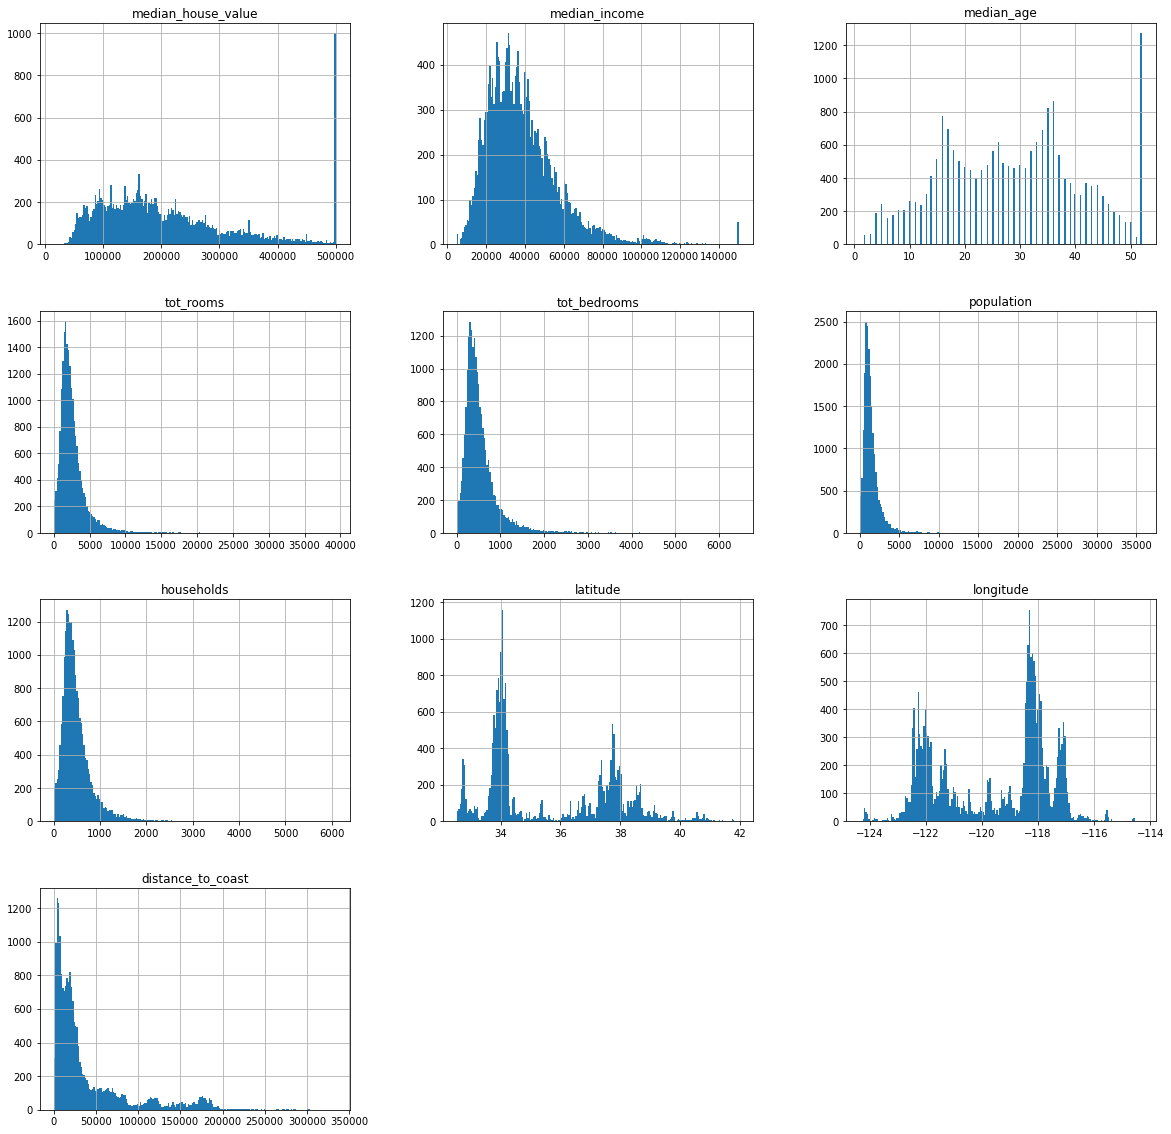

In [18]:
houseHist = houseData.drop(['distance_to_la', 'distance_to_sandiego', 'distance_to_sanjose', 'distance_to_sanfrancisco'], axis=1)
houseHist.hist(bins=200, figsize=(20,20));

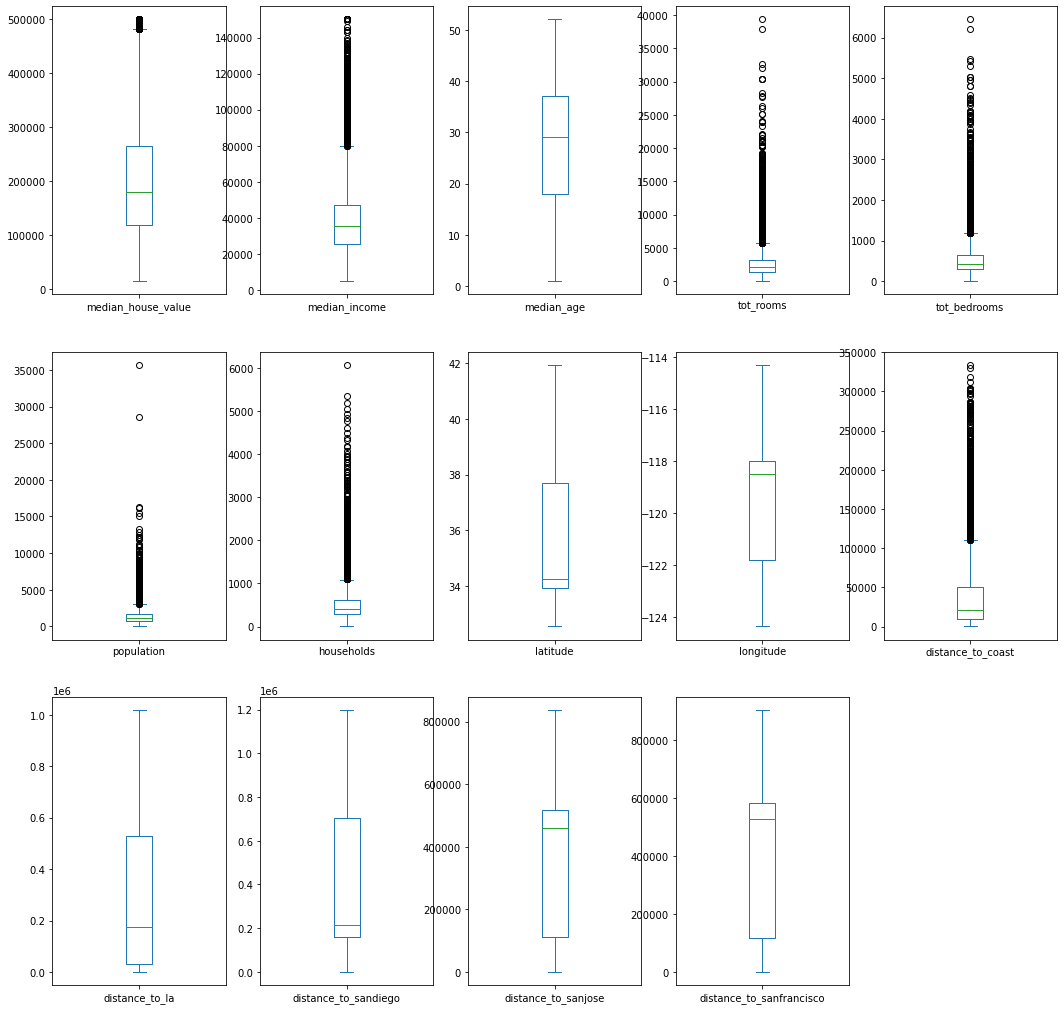

In [19]:
houseData.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (3,5));

From the boxplot we noticed most of the data for `households`, `tot_rooms`, and `tot_bedrooms` were skewed right with more outliers after the `75 percentile`. However, the distribution that is most normal was `median_house_value` and `median_age`.

Here we may predict and see the relationship that `median_income` has with the `median_house_value`. We can see that there is an effect size of about 4 that tells us a 1% change in `median_income` yields a 4% change in `median_house_value`. There is a 47 percent variance of `median_house_value` which tells us about half the variance in `median_house_value` is explained by `median_income`. 

In [20]:
outcome_1, predictors_1 = patsy.dmatrices("median_house_value ~ median_income", houseData)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:46:45   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.509e+04   1322.872     34.082

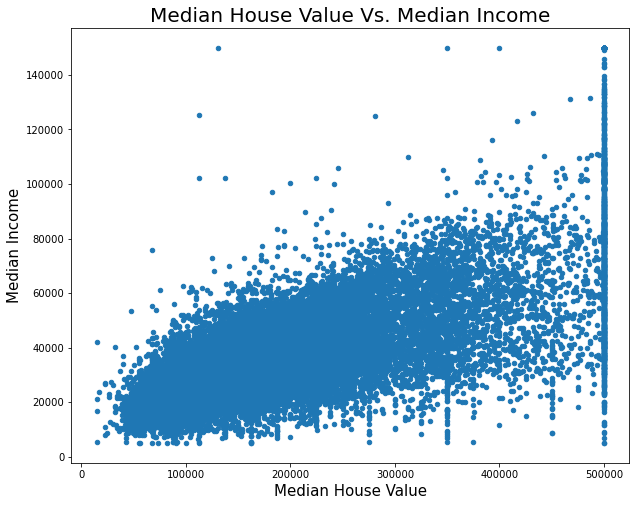

In [21]:
houseData.plot(kind = "scatter", x = 'median_house_value', y = 'median_income', figsize = (10, 8))
plt.xlabel("Median House Value", size = 15)
plt.ylabel("Median Income", size = 15)
plt.title("Median House Value Vs. Median Income", size = 20)
plt.show()

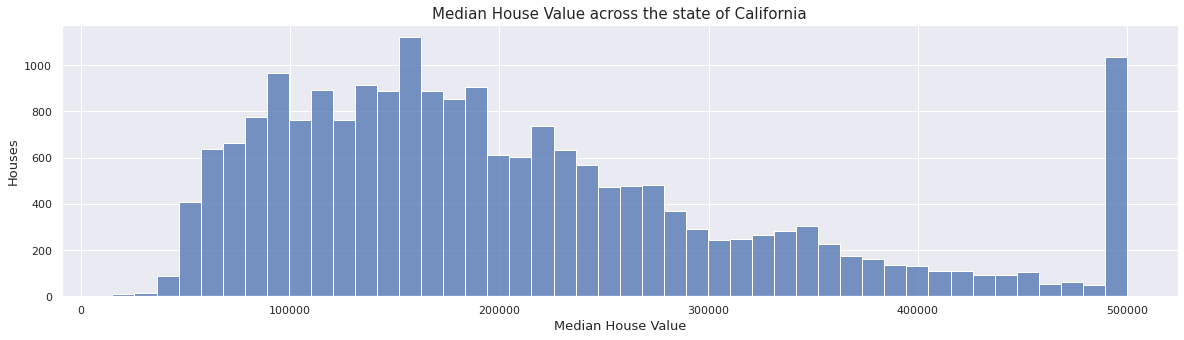

In [22]:
plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
sns.histplot(houseData['median_house_value'],color='b')
plt.title("Median House Value across the state of California", fontsize=15)
plt.xlabel("Median House Value", fontsize=13)
plt.ylabel("Houses", fontsize=13)
plt.show()

Next, we found the population based on `latitude` and `longitude`. This allows us to see the concentration of the houses and where the more populated ares are located. Observing the graph, this shows Northern California has a higher concentration of houses. There also seems to be a sparse distribution inland and greater population towards the major urban cities.

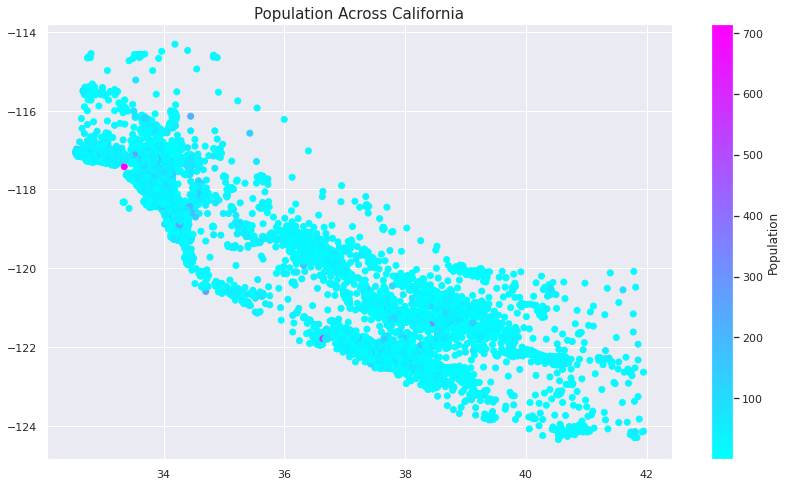

In [23]:
plt.figure(figsize=(14,8))
plt.scatter(houseData['latitude'],houseData['longitude'],c=houseData['population']/50, cmap='cool')
plt.colorbar().set_label("Population")
plt.title('Population Across California',fontsize=15)
plt.show()

After we overlapped the houses in California with fast food restaurants. Doing this let's us view the concentration of restaurants and households. From the graph we notice there is a higher concentration of restaurants where there are more houses listed. This distribution also shows sparse outliers with more restaurants inland. From this we can see that a relationship between restaurant locations and the concentration of houses does seem to exist.

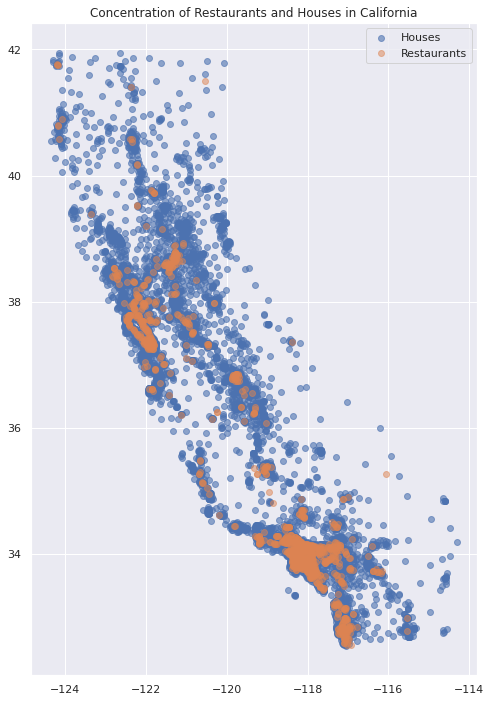

In [24]:
plt.figure(figsize = (8,12))
houses = plt.scatter(houseData["longitude"], houseData["latitude"], alpha = 0.6, cmap = 'viridis')
food = plt.scatter(foodData["longitude"], foodData["latitude"], alpha = 0.5, cmap = 'viridis')

plt.title("Concentration of Restaurants and Houses in California")
plt.legend(["Houses", "Restaurants"])

plt.show()